In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import os
import os
os.chdir('/content/drive/Shared drives/MachineLearningGroupProject/Models')

In [0]:
import numpy as np
import pandas as pd

In [0]:
# read the base file
data = pd.read_csv('BaseModelInput.csv')

In [0]:
data = data.drop(columns = ['Unnamed: 0'])

In [0]:
# split dataset into X and y sets
X = data.drop(columns=['MarketValue'])
y = data['MarketValue']

In [0]:
X.shape

(9905, 23)

In [0]:
y.shape

(9905,)

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
# split into train and test sets
random_state = 124
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.25, random_state = random_state)

In [0]:
# train a base random forest model
from sklearn.ensemble import RandomForestRegressor
regr_base = RandomForestRegressor()
regr_base.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
preds = regr_base.predict(X_test)

In [0]:
# find training set score
train_score = regr_base.score(X_train, y_train)
train_score

0.9353942104932833

In [0]:
# find test set score
test_score = regr_base.score(X_test, y_test)
test_score

0.5296476855647596

In [0]:
# find mean absolute error
errors = abs(preds - y_test)
round(np.mean(errors), 2)

5338870.87

In [0]:
# find most important features
importances = {'features': list(X.columns.values), 'importance': regr_base.feature_importances_}
importances_df = pd.DataFrame(importances)
importances_df = importances_df.sort_values('importance', ascending=False)
importances_df[:5]

,features,importance
1,Goals,0.220161
7,Euro_Tourney,0.209554
6,Minutes,0.146825
0,Season,0.088259
2,Assists,0.070949


In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# create a dictionary of parameters 
param_grid = {'n_estimators':[10, 50, 100, 500],
              'max_features':[2, 4, 'sqrt', 'auto', 'log2'],
              'max_depth':[2, 3, 4, 5, 6],
              'min_samples_leaf':[1, 2, 5, 10, 20]}

# create a random forest regressor object
regr_obj = RandomForestRegressor(random_state = random_state)

In [0]:
# search through a random selection of the combinations in the grid
regr_rs = RandomizedSearchCV(regr_obj, param_grid, cv = 5, refit = True, n_jobs = -1, verbose = 4)
regr_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
regr_rs.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 10}

In [0]:
# find training set score
train_score_rs = regr_rs.best_estimator_.score(X_train, y_train)
train_score_rs

0.5112752685115853

In [0]:
# find test set score
test_score_rs = regr_rs.score(X_test, y_test)
test_score_rs

0.47196179336532673

In [0]:
data[data.position_Defender == 0]

,Season,MarketValue,Goals,Assists,YellowCards,SecondYellows,RedCards,Minutes,Euro_Tourney,Age,League_Type_High,League_Type_Low,League_Type_Medium,position_Attacker,position_Defender,position_Midfielder,Region_Africa,Region_Asia,Region_Australia,Region_Central and South America,Region_Eastern Europe,Region_Middle East,Region_North America,Region_Western Europe
0,2015,440000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,2016,6600000,0.0,0.0,0.0,0.0,0.0,90.0,0.0,27.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,2017,6600000,1.0,0.0,1.0,0.0,0.0,90.0,0.0,28.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,2018,8800000,14.0,7.0,0.0,0.0,0.0,1579.0,0.0,29.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,2019,27500000,7.0,1.0,3.0,0.0,0.0,822.0,0.0,30.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9879,2019,6600000,2.0,0.0,0.0,0.0,0.0,180.0,0.0,19.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
9888,2016,138000,13.0,1.0,1.0,0.0,0.0,1144.0,0.0,17.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
9889,2017,6600000,26.0,7.0,0.0,0.0,0.0,1689.0,0.0,18.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
9890,2018,5500000,5.0,2.0,0.0,0.0,0.0,956.0,0.0,19.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [0]:
# split dataset into X and y sets dropping defenders
data_nd = data[data.position_Defender == 0]
X_nd = data_nd.drop(columns=['MarketValue'])
y_nd = data_nd['MarketValue']

In [0]:
# split into train and test sets
random_state = 124
X_train_nd, X_test_nd, y_train_nd, y_test_nd = sklearn.model_selection.train_test_split(X_nd, y_nd, test_size = 0.25, random_state = random_state)

In [0]:
# search through a random selection of the combinations in the grid
regr_rs_nd = RandomizedSearchCV(regr_obj, param_grid, cv = 5, refit = True, n_jobs = -1, verbose = 4)
regr_rs_nd.fit(X_train_nd, y_train_nd)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
# find training set score
train_score_rs_nd = regr_rs_nd.best_estimator_.score(X_train_nd, y_train_nd)
train_score_rs_nd

0.5323311049342448

In [0]:
regr_rs_nd.best_params_

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 100}

Try again with the larger AllCleanedPlayers dataset

In [0]:
all_data = pd.read_csv('AllCleanedPlayers.csv')

In [9]:
all_data.head

<bound method NDFrame.head of       Unnamed: 0  PlayerID  Season  ...          Team         MV  League_Type
0              0         1    2019  ...  Liverpool FC  100000000         High
1              1         2    2019  ...  Liverpool FC  110000000         High
2              2         3    2019  ...  Liverpool FC   80000000         High
3              3         4    2019  ...  Liverpool FC   50000000         High
4              4         5    2019  ...  Liverpool FC   90000000         High
...          ...       ...     ...  ...           ...        ...          ...
1240        1240     80667    2019  ...          SPAL     600000       Medium
1241        1241     80670    2019  ...          SPAL    5000000       Medium
1242        1242     80679    2019  ...          SPAL    2000000       Medium
1243        1243     80680    2019  ...          SPAL    1500000       Medium
1244        1244     80684    2019  ...          SPAL    6000000       Medium

[1245 rows x 64 columns]>

In [0]:
all_data = pd.get_dummies(all_data, columns = ['League_Type'], prefix=['League_Type'])

In [12]:
all_data.head

<bound method NDFrame.head of       Unnamed: 0  PlayerID  ...  League_Type_Low League_Type_Medium
0              0         1  ...                0                  0
1              1         2  ...                0                  0
2              2         3  ...                0                  0
3              3         4  ...                0                  0
4              4         5  ...                0                  0
...          ...       ...  ...              ...                ...
1240        1240     80667  ...                0                  1
1241        1241     80670  ...                0                  1
1242        1242     80679  ...                0                  1
1243        1243     80680  ...                0                  1
1244        1244     80684  ...                0                  1

[1245 rows x 66 columns]>

In [0]:
# create X and y sets
X_all = all_data.drop(columns = ['Unnamed: 0', 'PlayerID', 'Season', 'Player', 'League', 'Team', 'MV'])
y_all = all_data['MV']

In [0]:
# split into train and test sets
random_state = 124
X_all_train, X_all_test, y_all_train, y_all_test = sklearn.model_selection.train_test_split(X_all, y_all, test_size = 0.25, random_state = random_state)

In [16]:
regr_all_base = RandomForestRegressor()
regr_all_base.fit(X_all_train, y_all_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
# find training set score
train_all_score = regr_all_base.score(X_all_train, y_all_train)
train_all_score

0.9392250070261458

In [18]:
# find test set score
test_all_score = regr_all_base.score(X_all_test, y_all_test)
test_all_score

0.6778145888903048

In [19]:
# find most important features
importances = {'features': list(X_all.columns.values), 'importance': regr_all_base.feature_importances_}
importances_df = pd.DataFrame(importances)
importances_df = importances_df.sort_values('importance', ascending=False)
importances_df[:5]

,features,importance
55,pltime_xG+/-,0.290581
52,pltime_onxG,0.090120
4,stats_Gls,0.053155
0,Age,0.042066
50,pltime_onG,0.034326


In [21]:
# search through a random selection of the combinations in the grid
regr_all_rs = RandomizedSearchCV(regr_obj, param_grid, cv = 5, refit = True, n_jobs = -1, verbose = 4)
regr_all_rs.fit(X_all_train, y_all_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [23]:
regr_all_rs.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'n_estimators': 500}

In [24]:
# find training set score
train_score_all_rs = regr_all_rs.best_estimator_.score(X_all_train, y_all_train)
train_score_all_rs

0.6862258878702394

In [25]:
# find test set score
test_score_all_rs = regr_all_rs.best_estimator_.score(X_all_test, y_all_test)
test_score_all_rs

0.6567451422795284

In [26]:
# find most important features
importances = {'features': list(X_all.columns.values), 'importance': regr_all_rs.best_estimator_.feature_importances_}
importances_df = pd.DataFrame(importances)
importances_df = importances_df.sort_values('importance', ascending=False)
importances_df[:5]

,features,importance
55,pltime_xG+/-,0.098231
52,pltime_onxG,0.072841
44,pltime_+/-,0.072644
50,pltime_onG,0.068578
18,shoot_Sh,0.041306


In [0]:
preds_rs = regr_all_rs.best_estimator_.predict(X_all_test)

In [0]:
import seaborn as sns

Text(0.5, 1.0, 'Predicted vs Actual MarketValues in $100M')

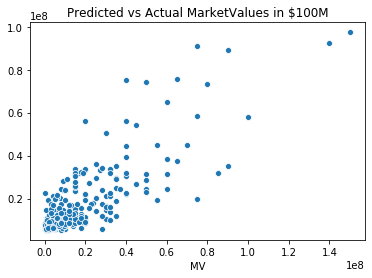

In [41]:
sns.scatterplot(y_all_test, preds_rs).set_title('Predicted vs Actual MarketValues in $100M')

In [0]:
# try xgboost
import xgboost as xgb

In [0]:
xgbr_obj = xgb.XGBRegressor()

In [29]:
# search through a random selection of the combinations in the grid
xgbr_all_rs = RandomizedSearchCV(xgbr_obj, param_grid, cv = 5, refit = True, n_jobs = -1, verbose = 4)
xgbr_all_rs.fit(X_all_train, y_all_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   15.6s


[19:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.5s finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [30]:
xgbr_all_rs.best_params_

{'max_depth': 2,
 'max_features': 4,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [31]:
# find training set score
train_score_all_rs_xgb = xgbr_all_rs.best_estimator_.score(X_all_train, y_all_train)
train_score_all_rs_xgb

0.8377925924723826

In [32]:
# find test set score
test_score_all_rs_xgb = xgbr_all_rs.best_estimator_.score(X_all_test, y_all_test)
test_score_all_rs_xgb

0.658917769973321

In [33]:
# find most important features
importances = {'features': list(X_all.columns.values), 'importance': xgbr_all_rs.best_estimator_.feature_importances_}
importances_df = pd.DataFrame(importances)
importances_df = importances_df.sort_values('importance', ascending=False)
importances_df[:5]

,features,importance
52,pltime_onxG,0.132622
44,pltime_+/-,0.110292
15,shoot_Gls,0.109551
55,pltime_xG+/-,0.103951
21,shoot_npxG,0.062208


In [0]:
preds_xgb = xgbr_all_rs.best_estimator_.predict(X_all_test)

Text(0.5, 1.0, 'Predicted vs Actual MarketValues in $100M')

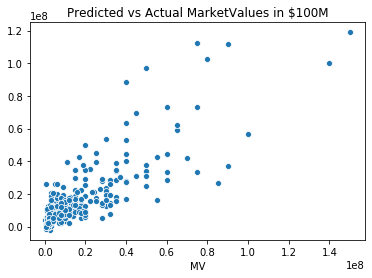

In [43]:
sns.scatterplot(y_all_test, preds_xgb).set_title('Predicted vs Actual MarketValues in $100M')

Distribution of Market Values

Text(0.5, 1.0, 'Distribution of Market Values')

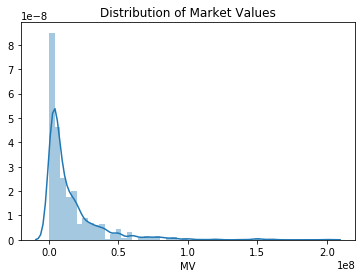

In [51]:
sns.distplot(all_data['MV']).set_title('Distribution of Market Values')

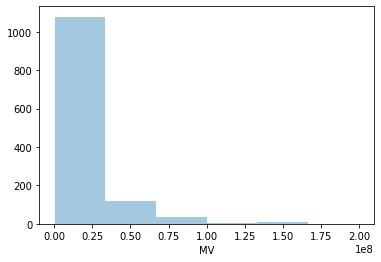

In [49]:
sns.distplot(all_data['MV'], bins = 6, kde=False)